# 使用するパッケージの宣言

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 初期描画

In [3]:
fig = plt.figure()

In [4]:
ax  = fig.add_subplot('111')

## 赤い壁を描く

In [5]:
ax.plot([1, 1], [0, 1], color='red', linewidth=2)
ax.plot([1, 2], [2, 2], color='red', linewidth=2)
ax.plot([2, 2], [2, 1], color='red', linewidth=2)
ax.plot([2, 3], [1, 1], color='red', linewidth=2)

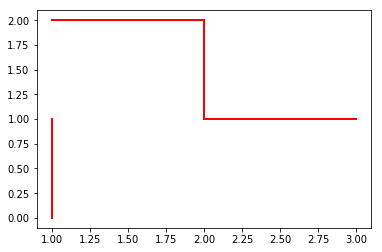

In [6]:
fig

## 状態を示す文字S0～S8を描く

In [7]:
ax.text(0.5, 2.5, 'S0', size=14, ha='center')
ax.text(1.5, 2.5, 'S1', size=14, ha='center')
ax.text(2.5, 2.5, 'S2', size=14, ha='center')
ax.text(0.5, 1.5, 'S3', size=14, ha='center')
ax.text(1.5, 1.5, 'S4', size=14, ha='center')
ax.text(2.5, 1.5, 'S5', size=14, ha='center')
ax.text(0.5, 0.5, 'S6', size=14, ha='center')
ax.text(1.5, 0.5, 'S7', size=14, ha='center')
ax.text(2.5, 0.5, 'S8', size=14, ha='center')
ax.text(0.5, 2.3, 'START', ha='center')
ax.text(2.5, 0.3, 'GOAL', ha='center')

Text(2.5,0.3,'GOAL')

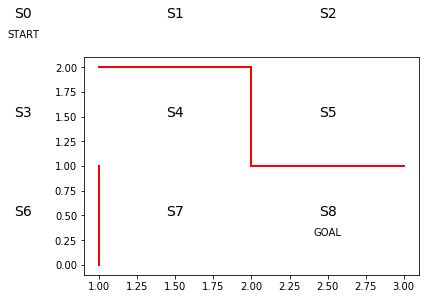

In [8]:
fig

## 描画範囲の設定と目盛りを消す設定

In [9]:
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)

(0, 3)

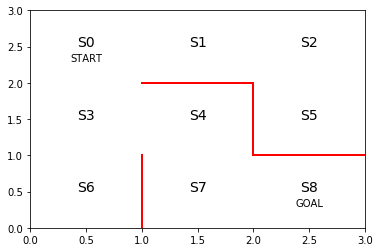

In [10]:
fig

In [11]:
ax.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

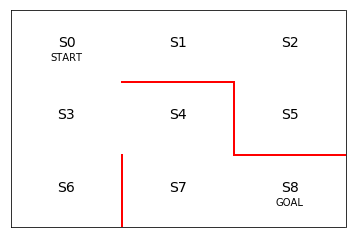

In [12]:
fig

## 現在地S0に緑丸を描画する

In [13]:
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

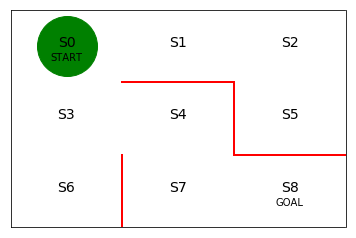

In [14]:
fig

# 初期の方策を決定するパラメータtheta_0を設定

行は状態0～7、列は移動方向で↑、→、↓、←を表す

In [15]:
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8はゴールなので、方策はなし
                    ])

# 方策パラメータthetaを行動方策piにソフトマックス関数で変換する手法の定義

In [17]:
def softmax_convert_into_pi_from_theta(theta):
    '''ソフトマックス関数で割合を計算する'''

    beta = 1.0
    [m, n] = theta.shape  # thetaの行列サイズを取得
    pi = np.zeros((m, n))

    exp_theta = np.exp(beta * theta)  # thetaをexp(theta)へと変換

    for i in range(0, m):
        # pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        # simpleに割合の計算の場合

        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        # softmaxで計算の場合

    pi = np.nan_to_num(pi)  # nanを0に変換

    return pi

# 初期の方策pi_0を求める

In [18]:
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


# 行動aと1step移動後の状態sを求める関数を定義

In [19]:
def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    # pi[s,:]の確率に従って、directionが選択される
    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        action = 0
        s_next = s - 3  # 上に移動するときは状態の数字が3小さくなる
    elif next_direction == "right":
        action = 1
        s_next = s + 1  # 右に移動するときは状態の数字が1大きくなる
    elif next_direction == "down":
        action = 2
        s_next = s + 3  # 下に移動するときは状態の数字が3大きくなる
    elif next_direction == "left":
        action = 3
        s_next = s - 1  # 左に移動するときは状態の数字が1小さくなる

    return [action, s_next]

In [31]:
np.random.choice?

In [30]:
np.random.choice(["A" , "B" , "C"] , p = [1/6,2/6,3/6])

'C'

# 迷路を解く関数の定義、状態と行動の履歴を出力

- (現在地、アクション）のペアを記録していく
- アクションは

|up|right|down|left|
|-|-|-|-|
|0|1|2|3|

In [41]:
def goal_maze_ret_s_a(pi):
    s = 0  # スタート地点
    s_a_history = [[0, np.nan]]  # エージェントの移動を記録するリスト

    while (1):  # ゴールするまでループ
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action
        # 現在の状態（つまり一番最後なのでindex=-1）の行動を代入

        s_a_history.append([next_s, np.nan])
        # 次の状態を代入。行動はまだ分からないのでnanにしておく

        if next_s == 8:  # ゴール地点なら終了
            break
        else:
            s = next_s

    return s_a_history

## SANDBOX

In [37]:
s = 0
s_a_history = [[0,np.nan]]

In [38]:
[action, next_s] = get_action_and_next_s(pi_0, s)

In [39]:
next_s

1

In [40]:
action

1

# 初期の方策で迷路を解く

In [45]:
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")

[[0, 2], [3, 0], [0, 2], [3, 1], [4, 3], [3, 0], [0, 2], [3, 1], [4, 3], [3, 0], [0, 1], [1, 1], [2, 3], [1, 3], [0, 2], [3, 0], [0, 1], [1, 3], [0, 1], [1, 3], [0, 2], [3, 1], [4, 3], [3, 1], [4, 2], [7, 1], [8, nan]]
迷路を解くのにかかったステップ数は26です


# thetaの更新関数を定義します

In [87]:
def update_theta(theta, pi, s_a_history):
    eta = 0.1 # 学習率
    T = len(s_a_history) - 1  # ゴールまでの総ステップ数

    [m, n] = theta.shape  # thetaの行列サイズを取得
    delta_theta = theta.copy()  # Δthetaの元を作成、ポインタ参照なので、delta_theta = thetaはダメ

    # delta_thetaを要素ごとに求めます
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):  # thetaがnanでない場合

                SA_i = [SA for SA in s_a_history if SA[0] == i]
                # 履歴から状態iのものを取り出すリスト内包表記です

                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                # 状態iで行動jをしたものを取り出す

                N_i = len(SA_i)  # 状態iで行動した総回数
                N_ij = len(SA_ij)  # 状態iで行動jをとった回数
                
                # 初版では符号の正負に間違いがありました（修正日：180703）
                #delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T

    new_theta = theta + eta * delta_theta

    return new_theta

## 何をやっているかの考察

- ひとつのパスで同じノードを繰り返し訪れる
- そのパス内でのアクション選択確率は突っ込んだpiに依るので、基本的にはN_ij/N_i はpiとさほど乖離しないはず
- ただし、「正しい選択」をした場合は同じ所に戻ってくることが少ないはず
- こういうパス(i)ではN_ij/Niは「正しい選択(j)」に大きな重み付けをした形になっている
- したがって、そういうケースを利用して正しい選択への重み付けを増やす形で選択確率をアップデートしていっている

In [46]:
eta = 0.1 # 学習率
T = len(s_a_history) - 1  # ゴールまでの総ステップ数

In [50]:
T

26

In [52]:
theta = theta_0

|m|n|
|:-:|:-:|
|ノード数|各ノードでの可能なアクションのセットの数|

In [53]:
[m, n] = theta.shape  # thetaの行列サイズを取得
delta_theta = theta.copy()  # Δthetaの元を作成、ポインタ参照なので、delta_theta = thetaはダメ

In [54]:
theta

array([[nan,  1.,  1., nan],
       [nan,  1., nan,  1.],
       [nan, nan,  1.,  1.],
       [ 1.,  1.,  1., nan],
       [nan, nan,  1.,  1.],
       [ 1., nan, nan, nan],
       [ 1., nan, nan, nan],
       [ 1.,  1., nan, nan]])

In [ ]:
# delta_thetaを要素ごとに求めます
for i in range(0, m):
    for j in range(0, n):
        if not(np.isnan(theta[i, j])):  # thetaがnanでない場合

In [65]:
i = 0
j = 2

In [66]:
SA_i = [SA for SA in s_a_history if SA[0] == i]
# 履歴から状態iのものを取り出すリスト内包表記です

In [60]:
"->".join([str(s[0]) for s in s_a_history])

'0->3->0->3->4->3->0->3->4->3->0->1->2->1->0->3->0->1->0->1->0->3->4->3->4->7->8'

In [67]:
SA_i

[[0, 2], [0, 2], [0, 2], [0, 1], [0, 2], [0, 1], [0, 1], [0, 2]]

In [68]:
SA_ij = [SA for SA in s_a_history if SA == [i, j]]
# 状態iで行動jをしたものを取り出す

In [69]:
SA_ij

[[0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

In [76]:
N_i = len(SA_i)  # 状態iで行動した総回数
N_ij = len(SA_ij)  # 状態iで行動jをとった回数

In [77]:
N_i

8

In [78]:
N_ij

5

In [79]:
pi = pi_0

In [80]:
pi[i,j]

0.5

In [81]:
# 初版では符号の正負に間違いがありました（修正日：180703）
#delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T
delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T

In [ ]:
new_theta = theta + eta * delta_theta


return new_theta

# 方策の更新

In [88]:
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.49807693 0.50192307 0.        ]
 [0.         0.49807693 0.         0.50192307]
 [0.         0.         0.49903846 0.50096154]
 [0.33503833 0.33503833 0.32992334 0.        ]
 [0.         0.         0.49807693 0.50192307]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.49903846 0.50096154 0.         0.        ]]


# 方策勾配法で迷路を解く

In [89]:
# 初版で、def update_thetaに間違いがあった関係で、終了条件を変更します（修正日：180703）
#stop_epsilon = 10**-8  # 10^-8よりも方策に変化が少なくなったら学習終了とする
stop_epsilon = 10**-4  # 10^-4よりも方策に変化が少なくなったら学習終了とする


theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:  # is_continueがFalseになるまで繰り返す
    s_a_history = goal_maze_ret_s_a(pi)  # 方策πで迷路内を探索した履歴を求める
    new_theta = update_theta(theta, pi, s_a_history)  # パラメータΘを更新
    new_pi = softmax_convert_into_pi_from_theta(new_theta)  # 方策πの更新

    print(np.sum(np.abs(new_pi - pi)))  # 方策の変化を出力
    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")

    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.018066972647944546
迷路を解くのにかかったステップ数は24です
0.014073649268387056
迷路を解くのにかかったステップ数は44です
0.0066091085606596045
迷路を解くのにかかったステップ数は104です
0.010136495872916373
迷路を解くのにかかったステップ数は36です
0.008235748732017878
迷路を解くのにかかったステップ数は72です
0.027099373848395003
迷路を解くのにかかったステップ数は8です
0.012408225520258387
迷路を解くのにかかったステップ数は86です
0.014036730107937878
迷路を解くのにかかったステップ数は32です
0.04822622958594597
迷路を解くのにかかったステップ数は4です
0.02447320763906824
迷路を解くのにかかったステップ数は8です
0.010634852905378911
迷路を解くのにかかったステップ数は104です
0.047446123028411835
迷路を解くのにかかったステップ数は4です
0.010161970400114684
迷路を解くのにかかったステップ数は42です
0.024644897329402782
迷路を解くのにかかったステップ数は12です
0.014448135579059662
迷路を解くのにかかったステップ数は42です
0.01771683400144869
迷路を解くのにかかったステップ数は16です
0.009306267682721414
迷路を解くのにかかったステップ数は74です
0.017199186987059245
迷路を解くのにかかったステップ数は26です
0.007666106589054922
迷路を解くのにかかったステップ数は42です
0.025275521631359932
迷路を解くのにかかったステップ数は12です
0.026114977715712806
迷路を解くのにかかったステップ数は8です
0.019882703442769933
迷路を解くのにかかったステップ数は18です
0.015497032323085469
迷路を解くのにかかったステップ数は12です
0.01290524286001

0.01865494112803326
迷路を解くのにかかったステップ数は26です
0.012801146061844432
迷路を解くのにかかったステップ数は40です
0.028721174762405155
迷路を解くのにかかったステップ数は4です
0.0164353646564043
迷路を解くのにかかったステップ数は40です
0.01800894208353665
迷路を解くのにかかったステップ数は6です
0.015387784967685697
迷路を解くのにかかったステップ数は8です
0.022973301722136352
迷路を解くのにかかったステップ数は10です
0.018820325198865756
迷路を解くのにかかったステップ数は10です
0.02220646218945574
迷路を解くのにかかったステップ数は8です
0.012623062597668405
迷路を解くのにかかったステップ数は18です
0.017827285805939508
迷路を解くのにかかったステップ数は10です
0.01764964046749712
迷路を解くのにかかったステップ数は26です
0.010016649852568782
迷路を解くのにかかったステップ数は12です
0.01669143779170032
迷路を解くのにかかったステップ数は18です
0.026241391238714357
迷路を解くのにかかったステップ数は16です
0.034117097867933543
迷路を解くのにかかったステップ数は10です
0.006476365930896788
迷路を解くのにかかったステップ数は16です
0.009190708914785545
迷路を解くのにかかったステップ数は10です
0.01943389790122782
迷路を解くのにかかったステップ数は8です
0.012477456123846542
迷路を解くのにかかったステップ数は40です
0.01426731711355006
迷路を解くのにかかったステップ数は10です
0.026315418866861173
迷路を解くのにかかったステップ数は6です
0.02838881229008844
迷路を解くのにかかったステップ数は4です
0.01641100048866137
迷路を解くのにか

0.010528031794973636
迷路を解くのにかかったステップ数は6です
0.007676143453608356
迷路を解くのにかかったステップ数は4です
0.007590173064786959
迷路を解くのにかかったステップ数は4です
0.010409243569414042
迷路を解くのにかかったステップ数は6です
0.007546726402027748
迷路を解くのにかかったステップ数は4です
0.01112830154934187
迷路を解くのにかかったステップ数は6です
0.01649134891729641
迷路を解くのにかかったステップ数は14です
0.007500226970749438
迷路を解くのにかかったステップ数は4です
0.010406449947993071
迷路を解くのにかかったステップ数は8です
0.011153394650504495
迷路を解くのにかかったステップ数は6です
0.0074885035008021295
迷路を解くのにかかったステップ数は4です
0.010371303081407782
迷路を解くのにかかったステップ数は6です
0.007446821232442669
迷路を解くのにかかったステップ数は4です
0.0073640554746716574
迷路を解くのにかかったステップ数は4です
0.007282564581558612
迷路を解くのにかかったステップ数は4です
0.007202324603578933
迷路を解くのにかかったステップ数は4です
0.015307773913465147
迷路を解くのにかかったステップ数は8です
0.007198773549804138
迷路を解くのにかかったステップ数は4です
0.010132872683246336
迷路を解くのにかかったステップ数は6です
0.015016366218150487
迷路を解くのにかかったステップ数は6です
0.0071699145641536954
迷路を解くのにかかったステップ数は4です
0.010083750085825946
迷路を解くのにかかったステップ数は6です
0.007136566481375006
迷路を解くのにかかったステップ数は4です
0.010805530695762941
迷路を解くのにかかった

0.002338418459720465
迷路を解くのにかかったステップ数は4です
0.009058629422106938
迷路を解くのにかかったステップ数は10です
0.005913312674088032
迷路を解くのにかかったステップ数は6です
0.0023836623140699176
迷路を解くのにかかったステップ数は4です
0.0023671267064644674
迷路を解くのにかかったステップ数は4です
0.0023507590791099486
迷路を解くのにかかったステップ数は4です
0.0058505640181488044
迷路を解くのにかかったステップ数は8です
0.002364291418972486
迷路を解くのにかかったステップ数は4です
0.002347981541393998
迷路を解くのにかかったステップ数は4です
0.006886355792568889
迷路を解くのにかかったステップ数は8です
0.0023671770459096006
迷路を解くのにかかったステップ数は4です
0.002350818367413021
迷路を解くのにかかったステップ数は4です
0.0050885805196789965
迷路を解くのにかかったステップ数は6です
0.0023560338872893744
迷路を解くのにかかったステップ数は4です
0.005906420455627087
迷路を解くのにかかったステップ数は8です
0.00237056943235852
迷路を解くのにかかったステップ数は4です
0.002354205550053043
迷路を解くのにかかったステップ数は4です
0.0023380067724636175
迷路を解くのにかかったステップ数は4です
0.002321970930306151
迷路を解くのにかかったステップ数は4です
0.002306095889075495
迷路を解くのにかかったステップ数は4です
0.0022903795483938394
迷路を解くのにかかったステップ数は4です
0.009499015952040848
迷路を解くのにかかったステップ数は6です
0.005817106699954437
迷路を解くのにかかったステップ数は6です
0.0023121105084036447
迷路を

0.0009835870833742148
迷路を解くのにかかったステップ数は4です
0.000979069864649136
迷路を解くのにかかったステップ数は4です
0.0009745833768413058
迷路を解くのにかかったステップ数は4です
0.0009701273442193625
迷路を解くのにかかったステップ数は4です
0.0009657014941116711
迷路を解くのにかかったステップ数は4です
0.006083519575999653
迷路を解くのにかかったステップ数は12です
0.003331014039781078
迷路を解くのにかかったステップ数は6です
0.001001775903630188
迷路を解くのにかかったステップ数は4です
0.0009971202327999883
迷路を解くのにかかったステップ数は4です
0.0009924966478653853
迷路を解くのにかかったステップ数は4です
0.0009879048569598654
迷路を解くのにかかったステップ数は4です
0.000983344571503196
迷路を解くのにかかったステップ数は4です
0.0009788155061568361
迷路を解くのにかかったステップ数は4です
0.007485381444295811
迷路を解くのにかかったステップ数は6です
0.0031061956950666665
迷路を解くのにかかったステップ数は6です
0.000988452646492926
迷路を解くのにかかったステップ数は4です
0.003365875165846268
迷路を解くのにかかったステップ数は6です
0.0009958200204141995
迷路を解くのにかかったステップ数は4です
0.0009912200642397291
迷路を解くのにかかったステップ数は4です
0.0009866515649830307
迷路を解くのにかかったステップ数は4です
0.00098211423914547
迷路を解くのにかかったステップ数は4です
0.0037918726735688447
迷路を解くのにかかったステップ数は6です
0.0009902390775811468
迷路を解くのにかかったステップ数は4です
0.003850214085109004

0.00062475027207037
迷路を解くのにかかったステップ数は4です
0.000622400126839083
迷路を解くのにかかったステップ数は4です
0.0006200632478472017
迷路を解くのにかかったステップ数は4です
0.0006177395352249954
迷路を解くのにかかったステップ数は4です
0.0006154288900434221
迷路を解くのにかかったステップ数は4です
0.0006131312143004795
迷路を解くのにかかったステップ数は4です
0.0006108464109146026
迷路を解くのにかかったステップ数は4です
0.0006085743837097243
迷路を解くのにかかったステップ数は4です
0.002352427657010797
迷路を解くのにかかったステップ数は6です
0.0006119839269385988
迷路を解くのにかかったステップ数は4です
0.0006097089082781545
迷路を解くのにかかったステップ数は4です
0.0006074465668365614
迷路を解くのにかかったステップ数は4です
0.0006051968084998839
迷路を解くのにかかったステップ数は4です
0.0023754808524080948
迷路を解くのにかかったステップ数は6です
0.0006088446842026016
迷路を解くのにかかったステップ数は4です
0.0006065899806362435
迷路を解くのにかかったステップ数は4です
0.0006043477809624283
迷路を解くのにかかったステップ数は4です
0.0006021179928892562
迷路を解くのにかかったステップ数は4です
0.0005999005249718442
迷路を解くのにかかったステップ数は4です
0.002804031902739524
迷路を解くのにかかったステップ数は6です
0.0006051237927683605
迷路を解くのにかかったステップ数は4です
0.0006028892445240144
迷路を解くのにかかったステップ数は4です
0.0006006670505797236
迷路を解くのにかかったステップ数は4です
0.00059845712005

迷路を解くのにかかったステップ数は4です
0.00038951399424637725
迷路を解くのにかかったステップ数は4です
0.0003883431112944105
迷路を解くのにかかったステップ数は4です
0.00038717751279949975
迷路を解くのにかかったステップ数は4です
0.00038601716700855174
迷路を解くのにかかったステップ数は4です
0.0003848620424082051
迷路を解くのにかかったステップ数は4です
0.00038371210771688535
迷路を解くのにかかったステップ数は4です
0.00038256733188996375
迷路を解くのにかかったステップ数は4です
0.0003814276841130407
迷路を解くのにかかったステップ数は4です
0.00038029313380013793
迷路を解くのにかかったステップ数は4です
0.0003791636505936155
迷路を解くのにかかったステップ数は4です
0.00037803920436148275
迷路を解くのにかかったステップ数は4です
0.0003769197651938491
迷路を解くのにかかったステップ数は4です
0.0003758053034025183
迷路を解くのにかかったステップ数は4です
0.0003746957895202248
迷路を解くのにかかったステップ数は4です
0.00037359119429396237
迷路を解くのにかかったステップ数は4です
0.0003724914886893034
迷路を解くのにかかったステップ数は4です
0.00037139664388358487
迷路を解くのにかかったステップ数は4です
0.0003703066312670325
迷路を解くのにかかったステップ数は4です
0.0003692214224387848
迷路を解くのにかかったステップ数は4です
0.00036814098920627883
迷路を解くのにかかったステップ数は4です
0.00036706530358348796
迷路を解くのにかかったステップ数は4です
0.0003659943377888192
迷路を解くのにかかったステップ数は4です
0.0020805858569692207


0.001645142008143214
迷路を解くのにかかったステップ数は6です
0.0002986113021912831
迷路を解くのにかかったステップ数は4です
0.00029781080356290277
迷路を解くのにかかったステップ数は4です
0.00029701356647495944
迷路を解くのにかかったステップ数は4です
0.0002962195730243575
迷路を解くのにかかったステップ数は4です
0.0002954288054309428
迷路を解くのにかかったステップ数は4です
0.00029464124603836503
迷路を解くのにかかったステップ数は4です
0.0002938568773114582
迷路を解くのにかかったステップ数は4です
0.00029307568183505744
迷路を解くのにかかったステップ数は4です
0.0002922976423155241
迷路を解くのにかかったステップ数は4です
0.00029152274157677113
迷路を解くのにかかったステップ数は4です
0.00029075096256009
迷路を解くのにかかったステップ数は4です
0.0002899822883249744
迷路を解くのにかかったステップ数は4です
0.001893628979569002
迷路を解くのにかかったステップ数は6です
0.0002930242466963103
迷路を解くのにかかったステップ数は4です
0.0002922471199869603
迷路を解くのにかかったステップ数は4です
0.0002914731217006413
迷路を解くのにかかったステップ数は4です
0.001932467009701913
迷路を解くのにかかったステップ数は6です
0.00029474477128267444
迷路を解くのにかかったステップ数は4です
0.00029396097528579766
迷路を解くのにかかったステップ数は4です
0.0002931803406798286
迷路を解くのにかかったステップ数は4です
0.000292402850327533
迷路を解くのにかかったステップ数は4です
0.003529849883308905
迷路を解くのにかかったステップ数は10です
0.00030158

0.004959548386751408
迷路を解くのにかかったステップ数は6です
0.0002205814989791645
迷路を解くのにかかったステップ数は4です
0.00022008463922540758
迷路を解くのにかかったステップ数は4です
0.00021958946606582055
迷路を解くのにかかったステップ数は4です
0.00021909597182692697
迷路を解くのにかかったステップ数は4です
0.0002186041488784797
迷路を解くのにかかったステップ数は4です
0.00021811398963390155
迷路を解くのにかかったステップ数は4です
0.0002176254865499539
迷路を解くのにかかったステップ数は4です
0.00021713863212644013
迷路を解くのにかかったステップ数は4です
0.00021665341890607197
迷路を解くのにかかったステップ数は4です
0.00021616983947328992
迷路を解くのにかかったステップ数は4です
0.00021568788645542555
迷路を解くのにかかったステップ数は4です
0.0002152075525208262
迷路を解くのにかかったステップ数は4です
0.0002147288303799358
迷路を解くのにかかったステップ数は4です
0.00021425171278419836
迷路を解くのにかかったステップ数は4です
0.000213776192525569
迷路を解くのにかかったステップ数は4です
0.00021330226243823636
迷路を解くのにかかったステップ数は4です
0.00021282991539414882
迷路を解くのにかかったステップ数は4です
0.00021235914430881367
迷路を解くのにかかったステップ数は4です
0.00021188994213366605
迷路を解くのにかかったステップ数は4です
0.00021142230186340857
迷路を解くのにかかったステップ数は4です
0.00021095621652952173
迷路を解くのにかかったステップ数は4です
0.0002104916792035668
迷路を解くのにかかったステップ数は4で

0.0014901376683391747
迷路を解くのにかかったステップ数は6です
0.00013818167983039448
迷路を解くのにかかったステップ数は4です
0.0001379296112074737
迷路を解くのにかかったステップ数は4です
0.00013767824628295976
迷路を解くのにかかったステップ数は4です
0.00013742758238348765
迷路を解くのにかかったステップ数は4です
0.0001371776168486178
迷路を解くのにかかったステップ数は4です
0.00013692834703086035
迷路を解くのにかかったステップ数は4です
0.00013667977029617646
迷路を解くのにかかったステップ数は4です
0.0001364318840212462
迷路を解くのにかかったステップ数は4です
0.00013618468559780175
迷路を解くのにかかったステップ数は4です
0.00013593817242897079
迷路を解くのにかかったステップ数は4です
0.0001356923419299546
迷路を解くのにかかったステップ数は4です
0.00013544719152928583
迷路を解くのにかかったステップ数は4です
0.00013520271866619693
迷路を解くのにかかったステップ数は4です
0.000134958920795996
迷路を解くのにかかったステップ数は4です
0.00013471579538140883
迷路を解くのにかかったステップ数は4です
0.00013447333989952993
迷路を解くのにかかったステップ数は4です
0.00013423155184045903
迷路を解くのにかかったステップ数は4です
0.00013399042870540674
迷路を解くのにかかったステップ数は4です
0.00013374996800623318
迷路を解くのにかかったステップ数は4です
0.00013351016726831887
迷路を解くのにかかったステップ数は4です
0.00013327102402875025
迷路を解くのにかかったステップ数は4です
0.00013303253583556683
迷路を解くのにかかったステップ数

- 上記の例だとステップ数が（これ以上小さくしようがない）４でフィックスされることでthetaのアップデートはばが小さくなって学習が終わっている

# 最終的な方策を確認

In [90]:
np.set_printoptions(precision=3, suppress=True)  # 有効桁数3、指数表示しないという設定
print(pi)

[[0.    0.013 0.987 0.   ]
 [0.    0.27  0.    0.73 ]
 [0.    0.    0.431 0.569]
 [0.009 0.98  0.011 0.   ]
 [0.    0.    0.982 0.018]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.015 0.985 0.    0.   ]]


- 正しい手を打つ確率が１に非常に近くなっている

# エージェントの移動の様子を可視化します

In [91]:
# 参考URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    # 背景画像の初期化
    line.set_data([], [])
    return (line,)


def animate(i):
    # フレームごとの描画内容
    state = s_a_history[i][0]  # 現在の場所を描く
    x = (state % 3) + 0.5  # 状態のx座標は、3で割った余り+0.5
    y = 2.5 - int(state / 3)  # y座標は3で割った商を2.5から引く
    line.set_data(x, y)
    return (line,)


#　初期化関数とフレームごとの描画関数を用いて動画を作成
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())

# sandbox

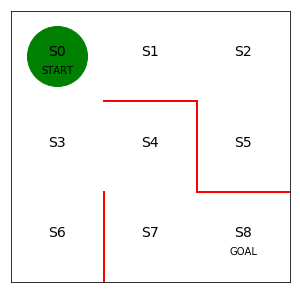

In [2]:
# 初期位置での迷路の様子

# 図を描く大きさと、図の変数名を宣言
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 赤い壁を描く
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 状態を示す文字S0～S8を描く
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

# 現在地S0に緑丸を描画する
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [92]:
%%bash
git commit -a -m "moving on to 2_4"

[master 13010cd] moving on to 2_4
 1 file changed, 5681 insertions(+), 6541 deletions(-)
